In [1]:
#Importing the important libraries i need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import mean_squared_error
from time import time

In [2]:
#Reading the dataset
df = pd.read_csv("sabiu.csv") 

In [3]:
df.shape

(100000, 9)

In [4]:
#Exploring the dataset to get some statistical information

df.describe()

,age,hypertension,heartdisease,bmi,HbA1clevel,bloodglucoselevel,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
#Checking all columns in the dataset

df.columns

Index(['gender', 'age', 'hypertension', 'heartdisease', 'smokinghistory',
       'bmi', 'HbA1clevel', 'bloodglucoselevel', 'diabetes'],
      dtype='object')

In [6]:
#Exploring the dataset to check for null values data and showing details about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   gender             100000 non-null  object 
 1   age                100000 non-null  float64
 2   hypertension       100000 non-null  int64  
 3   heartdisease       100000 non-null  int64  
 4   smokinghistory     100000 non-null  object 
 5   bmi                100000 non-null  float64
 6   HbA1clevel         100000 non-null  float64
 7   bloodglucoselevel  100000 non-null  int64  
 8   diabetes           100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
#Converting dataset to categorical
df["gender"]=df["gender"].astype("category")
df["age"]=df["age"].astype("category")
df["hypertension"]=df["hypertension"].astype("category")
df["heartdisease"]=df["heartdisease"].astype("category")
df["smokinghistory"]=df["smokinghistory"].astype("category")
df["bmi"]=df["bmi"].astype("category")
df["HbA1clevel"]=df["HbA1clevel"].astype("category")
df["bloodglucoselevel"]=df["bloodglucoselevel"].astype("category")
df["diabetes"]=df["diabetes"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   gender             100000 non-null  category
 1   age                100000 non-null  category
 2   hypertension       100000 non-null  category
 3   heartdisease       100000 non-null  category
 4   smokinghistory     100000 non-null  category
 5   bmi                100000 non-null  category
 6   HbA1clevel         100000 non-null  category
 7   bloodglucoselevel  100000 non-null  category
 8   diabetes           100000 non-null  category
dtypes: category(9)
memory usage: 1.1 MB


In [9]:
LE = LabelEncoder() #creating an instance of label encoder

In [10]:
df.gender = LE.fit_transform(df.gender)

In [11]:
df.smokinghistory = LE.fit_transform(df.smokinghistory)

In [12]:
df.gender = LE.fit_transform(df.gender)

In [13]:
df.head()

,gender,age,hypertension,heartdisease,smokinghistory,bmi,HbA1clevel,bloodglucoselevel,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [14]:
#Here i splitted the dataset into independent and dependent variables. SO my last column (diabetes) is my dependent feature
#The remaining columns are the independent variables

x = df.iloc[:,:-1]
x.head()


,gender,age,hypertension,heartdisease,smokinghistory,bmi,HbA1clevel,bloodglucoselevel
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [15]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: category
Categories (2, int64): [0, 1]

In [16]:
#Splitting the data into Training and Testing Split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=70)

In [17]:
x_train.head()

,gender,age,hypertension,heartdisease,smokinghistory,bmi,HbA1clevel,bloodglucoselevel
92443,0,42.0,0,0,0,27.32,5.8,85
90964,0,34.0,0,0,4,22.96,4.5,140
20293,1,50.0,0,0,0,27.32,6.1,130
33125,1,15.0,0,0,0,27.32,6.1,140
31099,0,57.0,0,0,4,25.00,6.0,90


In [18]:
#Checking for the shape of the x_train
x_train.shape

(90000, 8)

In [19]:
#Checking for the shape of the y_train

y_train.shape

(90000,)

In [20]:
#Model Building with DecisionTree

dt = DecisionTreeClassifier()

In [21]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
#Comparison between actual and predicted output. 
#That is, I tried to predict the output for the data

y_pred = dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#Checking the Accuracy of the DecisionTree Model

from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_pred,y_test)

0.9513

In [26]:
confusion_matrix(y_pred,y_test)

array([[8874,  207],
       [ 280,  639]], dtype=int64)

In [27]:
print (classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9081
           1       0.76      0.70      0.72       919

    accuracy                           0.95     10000
   macro avg       0.86      0.84      0.85     10000
weighted avg       0.95      0.95      0.95     10000



In [28]:
mean_squared_error(y_test, y_pred)

0.0487

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.22068076490713912

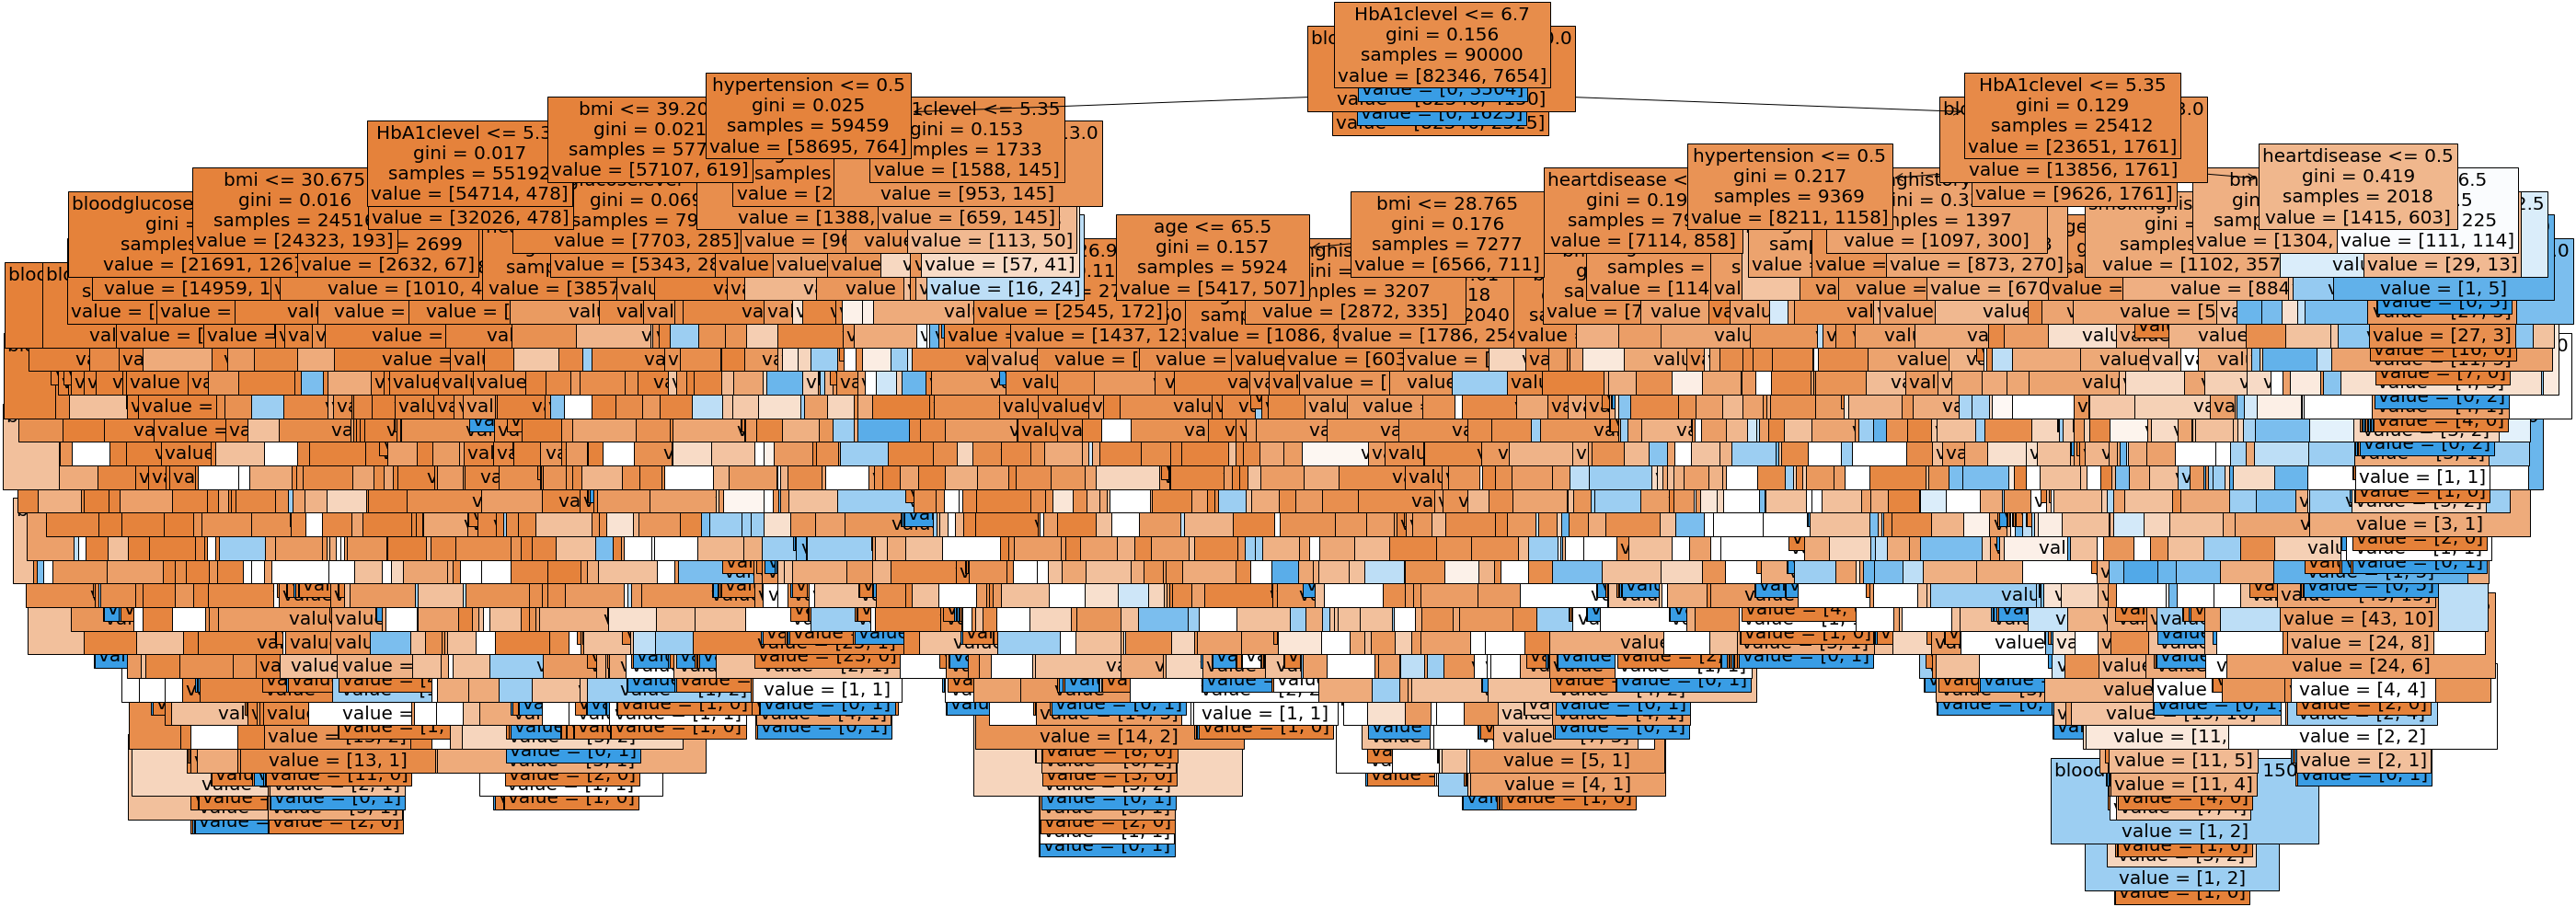

In [30]:
plt.figure(figsize=(45,17))
dtviz = tree.plot_tree(dt,feature_names=x.columns,filled=True, fontsize=20)